# EDA of DHS Nightlights data

Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

Reading the merged DHS & Nightlights dataset.

In [2]:
dhs_nightlights_path = "../data/Rwanda_10/DHS_Nightlights/DHS_Nightlights_data.csv"
dhs_nightlights_data = pd.read_csv(dhs_nightlights_path)
dhs_nightlights_data = dhs_nightlights_data.set_index('Cluster_Number')
dhs_nightlights_data.head()

,Mean_Nightlights,Wealth_Score
Cluster_Number,,
1.0,0.109091,-0.386620
2.0,0.000000,-0.421574
3.0,0.000000,-0.449724
4.0,0.000000,-0.390006
5.0,0.000000,-0.416924


## Get a quick sense of the dataset

In [3]:
dhs_nightlights_data.shape

(492, 2)

In [4]:
dhs_nightlights_data.dtypes

Mean_Nightlights    float64
Wealth_Score        float64
dtype: object

In [5]:
dhs_nightlights_data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 492 entries, 1.0 to 492.0
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mean_Nightlights  492 non-null    float64
 1   Wealth_Score      492 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB


In [6]:
dhs_nightlights_data.describe()

,Mean_Nightlights,Wealth_Score
count,492.000000,492.000000
mean,3.559818,0.002992
std,9.590184,0.835627
min,0.000000,-0.884895
25%,0.000000,-0.404195
50%,0.000000,-0.288727
75%,0.332025,-0.101608
max,44.239669,4.016780


In [7]:
dhs_nightlights_data.isnull().sum()

Mean_Nightlights    0
Wealth_Score        0
dtype: int64

## Let's observe the correlation between feature and the target

In [8]:
dhs_nightlights_data.corr()

,Mean_Nightlights,Wealth_Score
Mean_Nightlights,1.000000,0.864092
Wealth_Score,0.864092,1.000000


<AxesSubplot:xlabel='Mean_Nightlights', ylabel='Wealth_Score'>

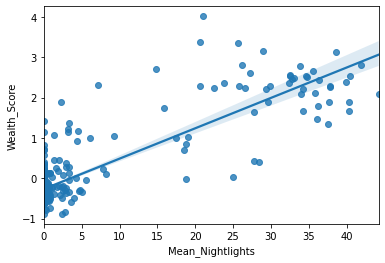

In [9]:
sns.regplot(x=dhs_nightlights_data['Mean_Nightlights'], y=dhs_nightlights_data['Wealth_Score'])

- From the regplot above, we could interpret the slope - for an increase in mean nightlight intesity by 10 units, the wealth score improves by 0.5. This is interpreted only from a small sample of many years of data collection. Are our interpretations statistically significant?
- We need to calculate the confidence interval to find if our interpretations could be trusted. And, in seaborn we can find this through the blue cone around the regression line in the regplot.

## Let's use statsmodels to understand the effect of feature on the target

In [10]:
model = smf.ols('Wealth_Score ~ Mean_Nightlights', data = dhs_nightlights_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Wealth_Score   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1444.
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          3.38e-148
Time:                        15:28:36   Log-Likelihood:                -271.51
No. Observations:                 492   AIC:                             547.0
Df Residuals:                     490   BIC:                             555.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2650      0.020    -13.088      0.000      -0.305      -0.225
Mean_Nightlights     0.0753      0.002     38.002      0.000       0.071       0.079
==============================================================================
Omnibus:                      231.171   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2054.345
Skew:                           1.828   Prob(JB):                         0.00
Kurtosis:                      12.319   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From this statistical analysis we get to know that for an increase in mean nightlights by 1 unit, the wealth score increases by 0.075 (as mean nightlights increases by 10 units, wealth score increases by 0.75 units), similar to what we found from the graphs.
- R square - around 75% of the variations in wealth score is explained by the variations in mean nightlight intensity. We could improve this score by adding more features (maybe other statistical measures of mean nightlights).

## Checking the residuals

Let's visualize distribution of residuals

In [11]:
predicted_wealth_score = model.predict(dhs_nightlights_data['Mean_Nightlights'])
residuals = predicted_wealth_score - dhs_nightlights_data['Wealth_Score']
RMSE = (residuals.map(lambda x: x**2).sum() / len(residuals))**0.5
RMSE

0.42017231247248765

/Users/aishwaryawahane/.pyenv/versions/3.7.7/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

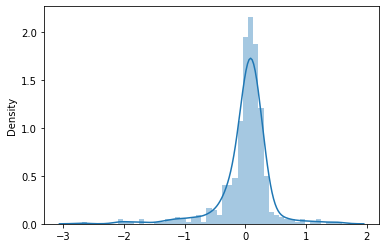

In [12]:
sns.distplot(residuals)

<AxesSubplot:xlabel='Wealth_Score', ylabel='Density'>

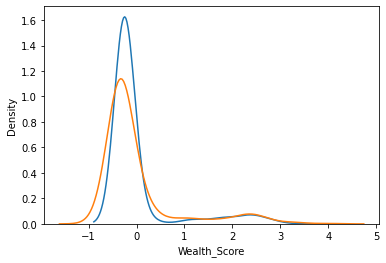

In [13]:
sns.kdeplot(predicted_wealth_score, label='predicted review score')
sns.kdeplot(dhs_nightlights_data['Wealth_Score'], label = 'actual review score')

Our statistical model is performing quite well! This means wealth score is definitely related to mean nightlight intensity. In future, mean nightlight intensity could be used to predict the wealth score instead of depending on traditional data collection methods.